In [33]:
import re
import nltk ,requests
from bs4 import BeautifulSoup
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
url = input("Enter url :")
full_url = 'http://'+url
new_url = full_url.replace("www.", "")

Enter url :www.quotes.toscrape.com


In [35]:
new_url

'http://quotes.toscrape.com'

In [36]:
#new_url = 'http://quotes.toscrape.com'
page = requests.get(new_url)

In [37]:
 soup = BeautifulSoup(page.content, 'html.parser')

In [38]:
 quote = soup.find_all('span', attrs={'class':'text'})

In [39]:
 quotes = [q.text.replace('“', '').replace('”', '') for q in quote]

In [40]:
s = ' '
s = s.join(quotes)

In [56]:
bad_chars = [';', ':', '!', ".","*",",","-"]
s = ''.join(i for i in s if not i in bad_chars)

In [57]:
wList = word_tokenize(s)
print(wList)

['The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', 'It', 'is', 'our', 'choices', 'Harry', 'that', 'show', 'what', 'we', 'truly', 'are', 'far', 'more', 'than', 'our', 'abilities', 'There', 'are', 'only', 'two', 'ways', 'to', 'live', 'your', 'life', 'One', 'is', 'as', 'though', 'nothing', 'is', 'a', 'miracle', 'The', 'other', 'is', 'as', 'though', 'everything', 'is', 'a', 'miracle', 'The', 'person', 'be', 'it', 'gentleman', 'or', 'lady', 'who', 'has', 'not', 'pleasure', 'in', 'a', 'good', 'novel', 'must', 'be', 'intolerably', 'stupid', 'Imperfection', 'is', 'beauty', 'madness', 'is', 'genius', 'and', 'it', "'s", 'better', 'to', 'be', 'absolutely', 'ridiculous', 'than', 'absolutely', 'boring', 'Try', 'not', 'to', 'become', 'a', 'man', 'of', 'success', 'Rather', 'become', 'a', 'man', 'of', 'value', 'It', 'is', 'better', 'to', 'be', 'hated', 'for', 'what', 'you', 

In [58]:
stop_words = set(stopwords.words('english'))

In [59]:
wordList = [word for word in wList if not word in stop_words]
print(wordList)

['The', 'world', 'created', 'process', 'thinking', 'It', 'changed', 'without', 'changing', 'thinking', 'It', 'choices', 'Harry', 'show', 'truly', 'far', 'abilities', 'There', 'two', 'ways', 'live', 'life', 'One', 'though', 'nothing', 'miracle', 'The', 'though', 'everything', 'miracle', 'The', 'person', 'gentleman', 'lady', 'pleasure', 'good', 'novel', 'must', 'intolerably', 'stupid', 'Imperfection', 'beauty', 'madness', 'genius', "'s", 'better', 'absolutely', 'ridiculous', 'absolutely', 'boring', 'Try', 'become', 'man', 'success', 'Rather', 'become', 'man', 'value', 'It', 'better', 'hated', 'loved', 'I', 'failed', 'I', "'ve", 'found', '10000', 'ways', 'wo', "n't", 'work', 'A', 'woman', 'like', 'tea', 'bag', 'never', 'know', 'strong', "'s", 'hot', 'water', 'A', 'day', 'without', 'sunshine', 'like', 'know', 'night']


In [60]:
word_type = nltk.pos_tag(wordList)
print(len(word_type))

90


In [61]:
counts = Counter( (word,tag) for word, tag in word_type)
print(sum(counts.values()))

90


In [62]:
print(counts)

Counter({('The', 'DT'): 3, ('It', 'PRP'): 3, ('thinking', 'VBG'): 2, ('without', 'IN'): 2, ('ways', 'NNS'): 2, ('though', 'IN'): 2, ('miracle', 'NN'): 2, ("'s", 'POS'): 2, ('better', 'RBR'): 2, ('absolutely', 'RB'): 2, ('become', 'NN'): 2, ('man', 'NN'): 2, ('I', 'PRP'): 2, ('like', 'IN'): 2, ('world', 'NN'): 1, ('created', 'VBD'): 1, ('process', 'NN'): 1, ('changed', 'VBD'): 1, ('changing', 'VBG'): 1, ('choices', 'VBZ'): 1, ('Harry', 'NNP'): 1, ('show', 'NN'): 1, ('truly', 'RB'): 1, ('far', 'RB'): 1, ('abilities', 'NNS'): 1, ('There', 'EX'): 1, ('two', 'CD'): 1, ('live', 'VBP'): 1, ('life', 'NN'): 1, ('One', 'CD'): 1, ('nothing', 'NN'): 1, ('everything', 'NN'): 1, ('person', 'NN'): 1, ('gentleman', 'JJ'): 1, ('lady', 'NN'): 1, ('pleasure', 'NN'): 1, ('good', 'JJ'): 1, ('novel', 'NN'): 1, ('must', 'MD'): 1, ('intolerably', 'RB'): 1, ('stupid', 'VB'): 1, ('Imperfection', 'NNP'): 1, ('beauty', 'NN'): 1, ('madness', 'NN'): 1, ('genius', 'NN'): 1, ('ridiculous', 'JJ'): 1, ('boring', 'JJ'):

In [63]:
Word_And_Type= []
Count = []
Word = []
Type = []

In [64]:
 for w, c in counts.most_common(100): 
    Word_And_Type.append(w)
    Count.append(c)

In [65]:
print(Word_And_Type)

[('The', 'DT'), ('It', 'PRP'), ('thinking', 'VBG'), ('without', 'IN'), ('ways', 'NNS'), ('though', 'IN'), ('miracle', 'NN'), ("'s", 'POS'), ('better', 'RBR'), ('absolutely', 'RB'), ('become', 'NN'), ('man', 'NN'), ('I', 'PRP'), ('like', 'IN'), ('world', 'NN'), ('created', 'VBD'), ('process', 'NN'), ('changed', 'VBD'), ('changing', 'VBG'), ('choices', 'VBZ'), ('Harry', 'NNP'), ('show', 'NN'), ('truly', 'RB'), ('far', 'RB'), ('abilities', 'NNS'), ('There', 'EX'), ('two', 'CD'), ('live', 'VBP'), ('life', 'NN'), ('One', 'CD'), ('nothing', 'NN'), ('everything', 'NN'), ('person', 'NN'), ('gentleman', 'JJ'), ('lady', 'NN'), ('pleasure', 'NN'), ('good', 'JJ'), ('novel', 'NN'), ('must', 'MD'), ('intolerably', 'RB'), ('stupid', 'VB'), ('Imperfection', 'NNP'), ('beauty', 'NN'), ('madness', 'NN'), ('genius', 'NN'), ('ridiculous', 'JJ'), ('boring', 'JJ'), ('Try', 'NNP'), ('success', 'NN'), ('Rather', 'NNP'), ('value', 'NN'), ('hated', 'VBD'), ('loved', 'JJ'), ('failed', 'VBD'), ("'ve", 'VBP'), ('fo

In [66]:
for w, t in Word_And_Type:
    Word.append(w)
    Type.append(t)

In [67]:
 df = pd.DataFrame({"Word":Word,"Type":Type,"Count":Count})

In [68]:
df

,Word,Type,Count
0,The,DT,3
1,It,PRP,3
2,thinking,VBG,2
3,without,IN,2
4,ways,NNS,2
...,...,...,...
69,A,DT,1
70,day,NN,1
71,sunshine,NN,1
72,know,NNS,1


Text(0, 0.5, 'Count')

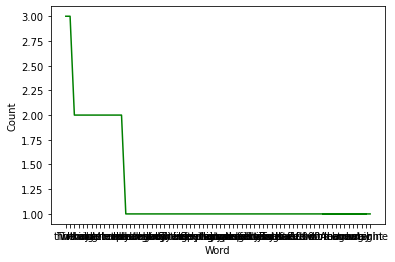

In [69]:
plt.plot(df.Word, df.Count,color='green')
plt.xlabel('Word')
plt.ylabel('Count')

In [70]:
allData = zip(Word, Type, Count)

In [71]:
document = Document()
print(document)

In [72]:
 document.add_heading('Word Scraper Counter', level=1)

In [73]:
 table = document.add_table(rows=1, cols=3)

In [74]:
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Word'
hdr_cells[1].text = 'Type'
hdr_cells[2].text = 'Count'

In [75]:
for word, typ, count in allData:
    row_cells = table.add_row().cells
    row_cells[0].text = word
    row_cells[1].text = typ
    row_cells[2].text = str(count)

In [76]:
document.add_page_break()

In [79]:
 document.save('File.docx')

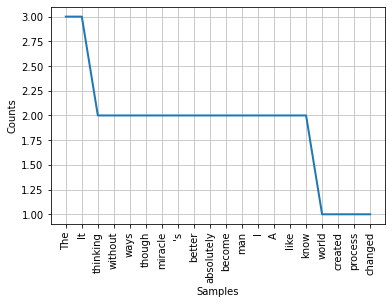

In [78]:
fd = nltk.FreqDist(wordList)
fd.plot(20)